# Golf_SwingML
### Luis R. Alvarez Jr
#### Leverage Google Cloud's Video Intelligence API to Annotate golf swing video!
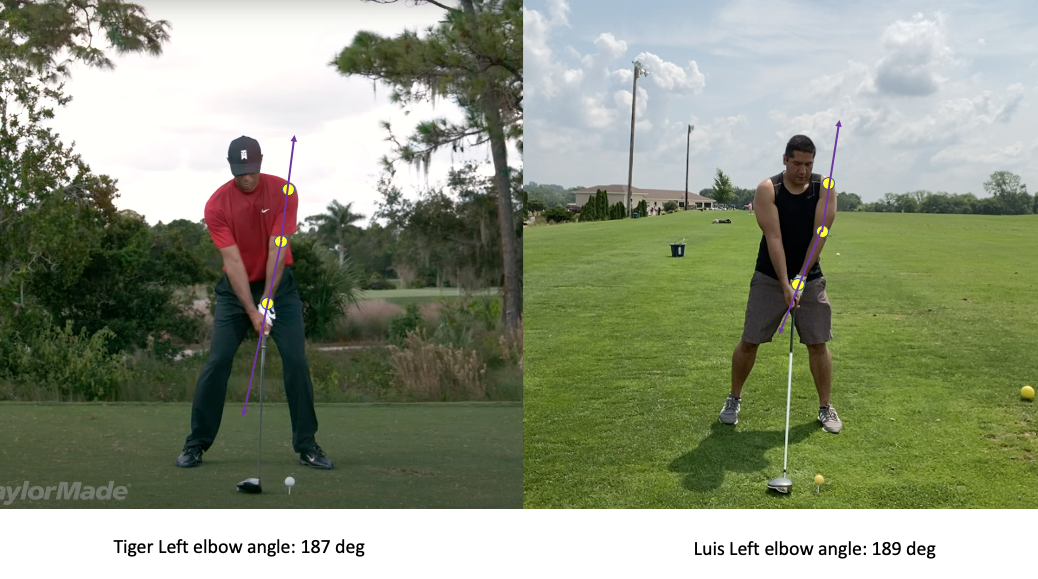

In [6]:
import math
import os
import sys
import json

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [7]:
# data manualy recorded for day at the range
swing_df = pd.read_csv('swing_distances.csv')

In [8]:
swing_df.describe()

,Distance
count,51.000000
mean,138.823529
std,52.341076
min,35.000000
25%,130.000000
50%,150.000000
75%,175.000000
max,200.000000


<AxesSubplot:ylabel='Frequency'>

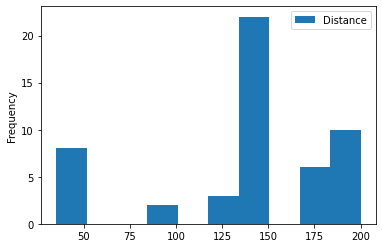

In [9]:
# Most common drive is about 140yds 
swing_df.plot.hist()

In [66]:
# When running operation using python to process video annotations
# hit a road block trying to find how to download json results from
# cloud.
# operation is a COROUTINE

<coroutine object VideoIntelligenceServiceAsyncClient.annotate_video at 0x7ff5dfc4a2c0>

In [10]:
# Mysterious name variable that was later discovered 
name = ''

In [11]:
# I had known the name I could have used this driver code to
# find the json files in the cloud and download.
response = await api.get_operation(name)

NameError: name 'api' is not defined

In [19]:
import json
# load annotations for Luis to perform preprocessing
Luis = json.load(open('output/luis_annotation_results.json'))


In [12]:
# inspect annotation files
#Luis

In [13]:
Tiger = json.load(open('output/tiger_annotation_results.json'))

In [14]:
## inspect annotation files
# Tiger

Code Credit: https://daleonai.com/machine-learning-for-sports

youtube https://www.youtube.com/watch?v=yLrOy2Xedgk

This blog post and vide are much of the inspiration behind this project

In [20]:
# preporcessing step to select annotations from large json file
Luis_annotations = Luis['annotation_results'][0]['person_detection_annotations']
Tiger_annotations = Tiger['annotationResults'][0]['personDetectionAnnotations']

In [16]:
# Example after preprocessing
#Luis_annotations[0]

In [17]:
# This funtion build x and y coordinates and to convert time stamps into seconds
# Note since Luis' and Tiger's annotations differ sligly in formating this code 
# is to be refactored between analyzing each person.
# Currently NOT set up to handle camelcase in tiger_annotations_results.json
# Agian code credit to @DALE
def analyzePerson(person):
  frames = []
  for track in person['tracks']:
    # Convert timestamps to seconds
    for ts_obj in track['timestamped_objects']:
      time_offset = ts_obj['time_offset']
      timestamp = 0
      if 'nanos' in time_offset:
        timestamp += time_offset['nanos'] / 10**9
      if 'seconds' in time_offset:
        timestamp += time_offset['seconds']
      if 'minutes' in time_offset:
        timestamp += time_offset['minutes'] * 60
      frame= {'timestamp' : timestamp}
      for landmark in ts_obj['landmarks']:
        frame[landmark['name'] + '_x'] = landmark['point']['x']
        # Subtract y value from 1 because positions are calculated
        # from the top left corner
        frame[landmark['name'] + '_y'] = 1 - landmark['point']['y']
      frames.append(frame)
  sorted(frames, key=lambda x: x['timestamp'])
  return frames

In [21]:
annotationsPd = pd.DataFrame(analyzePerson(Luis_annotations[0]))
for annotation in Luis_annotations[1:]:
  annotationsPd = annotationsPd.append(pd.DataFrame(analyzePerson(annotation)))

annotationsPd = annotationsPd.sort_values('timestamp', ascending=True)

In [22]:
# Luis DataFrame
Luis_df = pd.DataFrame.copy(annotationsPd)
Luis_df.head()

,timestamp,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.0000,0.518520,0.527764,0.522131,0.534182,0.514908,0.535786,0.526646,0.534182,0.508588,...,0.502268,0.405825,0.532063,0.332020,0.489628,0.336833,0.538383,0.261423,0.480599,0.267841
1,0.1001,0.518555,0.527769,0.522167,0.534186,0.514944,0.535790,0.526680,0.534186,0.508625,...,0.501403,0.405845,0.532097,0.332049,0.489667,0.336862,0.538416,0.261461,0.480639,0.267878
2,0.2002,0.518483,0.527786,0.522092,0.534200,0.514873,0.534200,0.526604,0.534200,0.508556,...,0.501337,0.405915,0.532018,0.332151,0.489607,0.336962,0.538335,0.261594,0.480583,0.268009
3,0.3003,0.518484,0.527794,0.522093,0.534207,0.514876,0.534207,0.526604,0.534207,0.508560,...,0.501343,0.405950,0.532017,0.332202,0.489615,0.337011,0.538332,0.261660,0.480593,0.268073
4,0.4004,0.517572,0.527791,0.521181,0.534205,0.513963,0.534205,0.525692,0.534205,0.507647,...,0.501331,0.405936,0.532008,0.332182,0.489602,0.336992,0.538324,0.261634,0.480579,0.268048


In [23]:
# Tiger DataFrame
Tiger_df = pd.DataFrame.copy(annotationsPd)
Tiger_df.head()

,timestamp,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.0000,0.518520,0.527764,0.522131,0.534182,0.514908,0.535786,0.526646,0.534182,0.508588,...,0.502268,0.405825,0.532063,0.332020,0.489628,0.336833,0.538383,0.261423,0.480599,0.267841
1,0.1001,0.518555,0.527769,0.522167,0.534186,0.514944,0.535790,0.526680,0.534186,0.508625,...,0.501403,0.405845,0.532097,0.332049,0.489667,0.336862,0.538416,0.261461,0.480639,0.267878
2,0.2002,0.518483,0.527786,0.522092,0.534200,0.514873,0.534200,0.526604,0.534200,0.508556,...,0.501337,0.405915,0.532018,0.332151,0.489607,0.336962,0.538335,0.261594,0.480583,0.268009
3,0.3003,0.518484,0.527794,0.522093,0.534207,0.514876,0.534207,0.526604,0.534207,0.508560,...,0.501343,0.405950,0.532017,0.332202,0.489615,0.337011,0.538332,0.261660,0.480593,0.268073
4,0.4004,0.517572,0.527791,0.521181,0.534205,0.513963,0.534205,0.525692,0.534205,0.507647,...,0.501331,0.405936,0.532008,0.332182,0.489602,0.336992,0.538324,0.261634,0.480579,0.268048


In [280]:
time = list(range(0,200))
# since tiger df fails to form time stamp adding integers to each row
Tiger_df['timestamp'] = time
Tiger_df.head()

,timestamp,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0,0.476711,0.649161,0.482156,0.665283,0.469452,0.662059,0.493045,0.678181,0.458563,...,0.462193,0.429902,0.531156,0.291253,0.442229,0.284804,0.542045,0.123584,0.420451,0.126808
127,1,0.457189,0.632411,0.460739,0.641870,0.453640,0.645023,0.471387,0.651329,0.453640,...,0.464288,0.427462,0.528176,0.272961,0.437668,0.288727,0.542374,0.124767,0.418146,0.124767
128,2,0.458942,0.630586,0.462526,0.643323,0.455357,0.643323,0.469695,0.652875,0.460734,...,0.466110,0.423619,0.528836,0.273965,0.439228,0.283518,0.543173,0.124312,0.419514,0.124312
129,3,0.460724,0.632194,0.462509,0.641712,0.457152,0.641712,0.469652,0.651230,0.460724,...,0.466081,0.422798,0.530366,0.276856,0.439295,0.283201,0.542866,0.124568,0.419652,0.124568
130,4,0.460844,0.634505,0.462618,0.643960,0.457296,0.643960,0.469714,0.650264,0.460844,...,0.467940,0.423321,0.531807,0.275177,0.439555,0.284633,0.544226,0.123881,0.418266,0.123881


In [282]:
# Class to help build angles based on x y data file
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y 

In [283]:
# Use Trig to trac objects in 2D
# Code Credit:
# https://manivannan-ai.medium.com/
# find-the-angle-between-three-points-from-2d-using-python-348c513e2cd
def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c.y-b.y, c.x-b.x) - math.atan2(a.y-b.y, a.x-b.x))
    return ang + 360 if ang < 0 else ang

In [284]:
# These functions calcluate angles for specific body part from collected data
# by latter applying the getAngle func.
def computeElbowAngle(row, which='left'):
  wrist = Point(row[f'{which}_wrist_x'], row[f'{which}_wrist_y'])
  elbow = Point(row[f'{which}_elbow_x'], row[f'{which}_elbow_y'])
  shoulder = Point(row[f'{which}_shoulder_x'], row[f'{which}_shoulder_y'])
  return getAngle(wrist, elbow, shoulder)

def computeShoulderAngle(row, which='left'):
  elbow = Point(row[f'{which}_elbow_x'], row[f'{which}_elbow_y'])
  shoulder = Point(row[f'{which}_shoulder_x'], row[f'{which}_shoulder_y'])
  hip = Point(row[f'{which}_hip_x'], row[f'{which}_hip_y'])
  return getAngle(hip, shoulder, elbow)

def computeKneeAngle(row, which='left'):
  hip = Point(row[f'{which}_hip_x'], row[f'{which}_hip_y'])
  knee = Point(row[f'{which}_knee_x'], row[f'{which}_knee_y'])
  ankle = Point(row[f'{which}_ankle_x'], row[f'{which}_ankle_y'])
  return getAngle(ankle, knee, hip)

In [293]:
# Build columns for the angles of the left arm durring a club swing.
# points abc of two vectors in order to calculate theta
Luis_df['left_elbow_angle'] = annotationsPd.apply(computeElbowAngle, axis=1)
Luis_df['left_shoulder_angle'] = annotationsPd.apply(computeShoulderAngle, axis=1)
Luis_df['left_knee_angle'] = annotationsPd.apply(computeKneeAngle, axis=1)

In [285]:
# Build columns for the angles of the left arm durring a club swing.
# points abc of two vectors in order to calculate theta
Tiger_df['left_elbow_angle'] = annotationsPd.apply(computeElbowAngle, axis=1)
Tiger_df['left_shoulder_angle'] = annotationsPd.apply(computeShoulderAngle, axis=1)
Tiger_df['left_knee_angle'] = annotationsPd.apply(computeKneeAngle, axis=1)

In [302]:
luis_swing = Luis_df[['timestamp','left_elbow_angle']]
luis_best_swing = pd.DataFrame(luis_swing[197:297])#subset one swing to analyze
luis_best_swing.to_csv('Luis_Best_swing.csv')
tiger_swing = Tiger_df[['timestamp','left_elbow_angle']]
tiger_swing.to_csv('Tiger_Best_swing.csv')
tiger_best_swing = pd.DataFrame(tiger_swing[80:120])#subset one swing to analyze

In [300]:
luis_best_swing.head()

,timestamp,left_elbow_angle
197,19.7197,NaN
198,19.8198,193.923481
199,19.9199,194.539962
200,20.0200,193.094946
201,20.1201,194.319716


In [310]:
tiger_best_swing.head()

,timestamp,left_elbow_angle
156,80,194.164680
157,81,191.294420
158,82,191.160445
159,83,191.943634
160,84,189.810402


<Figure size 432x288 with 0 Axes>

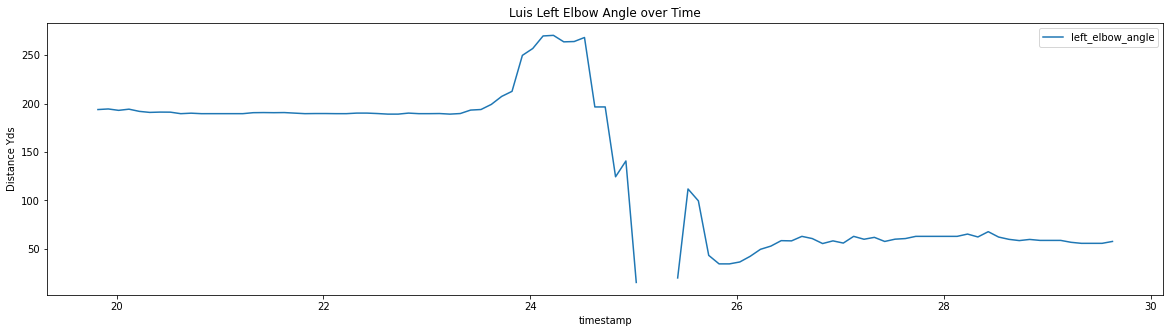

In [304]:
plt.figure()
luis_best_swing.plot('timestamp', ['left_elbow_angle'], figsize=(20,5))
plt.title("Luis Left Elbow Angle over Time")
plt.ylabel('Distance Yds')
plt.savefig("luis_right_elbow_angle")

<Figure size 432x288 with 0 Axes>

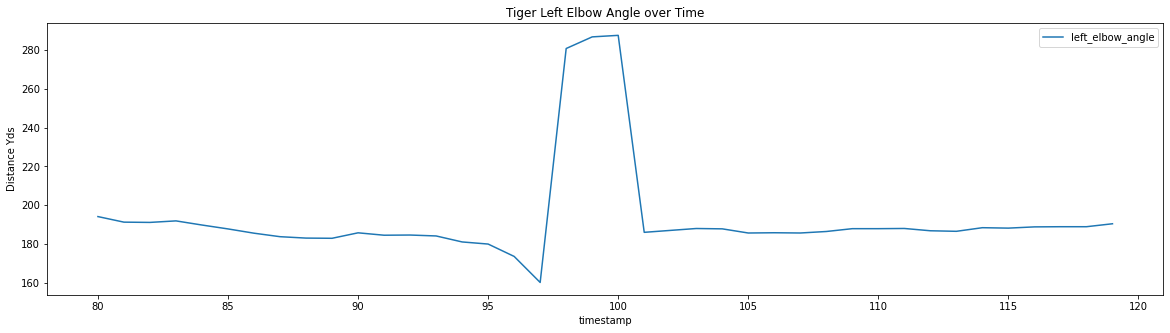

In [305]:
plt.figure()
tiger_best_swing.plot('timestamp', ['left_elbow_angle'], figsize=(20,5))
plt.title("Tiger Left Elbow Angle over Time")
plt.ylabel('Distance Yds')
plt.savefig("tiger_right_elbow_angle")
